# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></div><div class="lev1 toc-item"><a href="#Test-models" data-toc-modified-id="Test-models-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Test models</a></div><div class="lev2 toc-item"><a href="#Base-NN" data-toc-modified-id="Base-NN-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Base NN</a></div><div class="lev2 toc-item"><a href="#uBoost" data-toc-modified-id="uBoost-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>uBoost</a></div><div class="lev2 toc-item"><a href="#GradientBoosting" data-toc-modified-id="GradientBoosting-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>GradientBoosting</a></div>

This notebook test scanning over the model predictions.

# Imports

In [1]:
# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

import sys
sys.path.append('../')

In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

In [3]:
plt.rcParams.update({'font.family': 'cmr10',
                     'font.size': 12,
                     'axes.unicode_minus': False,
                     'axes.labelsize': 12,
                     'axes.labelsize': 12,
                     'figure.figsize': (4, 4),
                     'figure.dpi': 80,
                     'mathtext.fontset': 'cm',
                     'mathtext.rm': 'serif',
                     'xtick.direction': 'in',
                     'ytick.direction': 'in',
                     'xtick.top': True,
                     'ytick.right': True
                    })

In [4]:
from src.models import HelperFunctions

In [5]:
model_dir = '../models/'

In [6]:
# Load test data for 2 prong

# Test models
## Base NN

In [8]:
X_testscaled, y_test, mass = HelperFunctions.load_test_data_nn(2)
y_test = np.ravel(y_test)

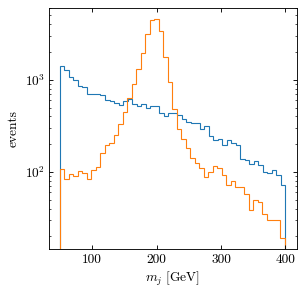

In [9]:
plt.hist(mass[y_test == 0], bins=50, histtype='step')
plt.hist(mass[y_test == 1], bins=50, histtype='step')
plt.ylabel('events')
plt.xlabel('$m_j$ [GeV]')
plt.yscale('log')
plt.show()

Load the base network

In [10]:
from keras.models import load_model

In [11]:
base_nn = load_model('../models/base_nn_2p.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [12]:
preds = base_nn.predict(X_testscaled)

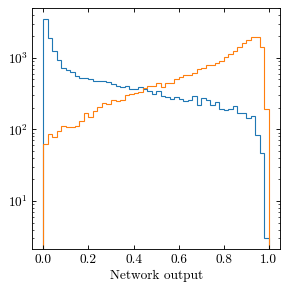

In [13]:
plt.hist(preds[y_test == 0], histtype='step', range=(0,1), bins=50)
plt.hist(preds[y_test == 1], histtype='step', range=(0,1), bins=50)
plt.yscale('log')
plt.xlabel('Network output')
plt.show()

The network achieves good separation. Now compute the scores

In [14]:
from sklearn.metrics import roc_curve, auc

In [15]:
fpr, tpr, thresholds = roc_curve(y_true=y_test,
                                 y_score=preds
                                )

In [16]:
base_auc = auc(fpr, tpr)

/Users/bryan/anaconda/envs/massagnosticjettaggers/lib/python3.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':


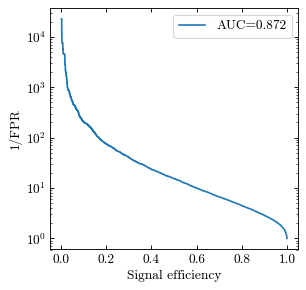

In [17]:
plt.plot(tpr, 1 / fpr, label='AUC={0:.3f}'.format(base_auc))
plt.xlabel('Signal efficiency')
plt.ylabel('1/FPR')
plt.yscale('log')
plt.legend()
plt.show()

## uBoost

In [17]:
testdf, y_test, data_cols = HelperFunctions.load_data_bdt(2, set='test')

In [18]:
import joblib

In [19]:
ubdt = joblib.load('../models/uBoost_2p.p')

/Users/bryan/anaconda/envs/massagnosticjettaggers/lib/python3.7/site-packages/sklearn/base.py:306: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.20.3 when using version 0.21.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [20]:
sig_prob = ubdt.predict_proba(testdf)[:, 1]

In [21]:
fpr_u, tpr_u, thresholds_u = roc_curve(y_true=y_test, y_score=sig_prob)
auc_c = auc(fpr_u, tpr_u)

/Volumes/ExternalData/massagnosticjettaggers/data/interim/


In [22]:
print(len(preds), len(sig_prob))

50884 50884


/Users/bryan/anaconda/envs/massagnosticjettaggers/lib/python3.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
/Users/bryan/anaconda/envs/massagnosticjettaggers/lib/python3.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app


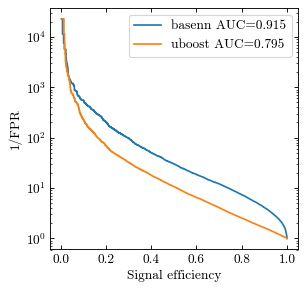

In [23]:
plt.plot(tpr, 1 / fpr, label='basenn AUC={0:.3f}'.format(base_auc))
plt.plot(tpr_u, 1 / fpr_u, label='uboost AUC={0:.3f}'.format(auc_c))
plt.xlabel('Signal efficiency')
plt.ylabel('1/FPR')
plt.yscale('log')
plt.legend()
plt.show()

## GradientBoosting

In [24]:
gb_clf = joblib.load('../models/GBC_2p.p')

In [25]:
gb_scores = gb_clf.predict_proba(testdf[data_cols[1:]])[: ,1]

In [26]:
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_true=y_test, y_score=gb_scores)
auc_gb = auc(fpr_gb, tpr_gb)

/Users/bryan/anaconda/envs/massagnosticjettaggers/lib/python3.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
/Users/bryan/anaconda/envs/massagnosticjettaggers/lib/python3.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app
/Users/bryan/anaconda/envs/massagnosticjettaggers/lib/python3.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()


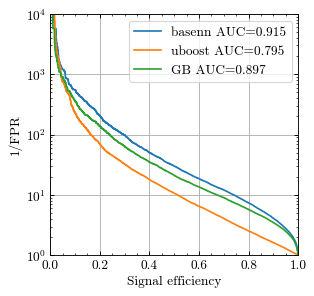

In [27]:
plt.plot(tpr, 1 / fpr, label='basenn AUC={0:.3f}'.format(base_auc))
plt.plot(tpr_u, 1 / fpr_u, label='uboost AUC={0:.3f}'.format(auc_c))
plt.plot(tpr_gb, 1 / fpr_gb, label='GB AUC={0:.3f}'.format(auc_gb))
plt.xlabel('Signal efficiency')
plt.ylabel('1/FPR')
plt.yscale('log')
plt.legend()
plt.xlim(0, 1)
plt.ylim(1, 1e4)
plt.grid()
plt.minorticks_on()
plt.show()